In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Ubicación archivo (carpeta del proyecto)
# data = pd.read_excel("/content/drive/MyDrive/DS4A - Proyecto/dataset/BD.xlsx", header=1)
data = pd.read_excel("/content/drive/MyDrive/BD.xlsx", header=1)
data.head()

,AÑO,CONSECUTIO,INSCRIPCION,LOCALIDAD,TIPO,COD TIPO,NOMBRE,General,Nutrición y Salubridad,Ambientes Adecuados y Seguros,Proceso Pedagógico,Talento Humano,Proceso Administrativo
0,2009.0,1.0,192.0,SUBA,PRIVADO,PRI,DEPARTAMENTO SOCIAL INFANTIL,1.0,1.0,1.0,1.0,1.0,1.0
1,2009.0,2.0,259.0,USAQUEN,PRIVADO,PRI,ALLEGRO PREESCOLAR,1.0,1.0,1.0,1.0,1.0,1.0
2,2009.0,3.0,265.0,USAQUEN,PRIVADO,PRI,CLASICOS INFANTILES (JARDIN INFANTIL),1.0,1.0,1.0,1.0,1.0,1.0
3,2009.0,4.0,272.0,TEUSAQUILLO,PRIVADO,PRI,ASPAEN MATERNAL Y PREESCOLAR ATAVANZA,1.0,1.0,1.0,1.0,1.0,1.0
4,2009.0,5.0,284.0,USAQUEN,PRIVADO,PRI,HUELLAS,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
data[["AÑO","INSCRIPCION"]].groupby(by=["AÑO"]).count()

,INSCRIPCION
AÑO,
2009,1009
2010,1226
2011,1062
2012,1262
2013,828
2014,1333
2015,1343
2016,2171
2017,133


In [ ]:
data[["AÑO","General","Nutrición y Salubridad","Ambientes Adecuados y Seguros","Proceso Pedagógico","Talento Humano","Proceso Administrativo"]].groupby(by=["AÑO"]).mean()

,General,Nutrición y Salubridad,Ambientes Adecuados y Seguros,Proceso Pedagógico,Talento Humano,Proceso Administrativo
AÑO,,,,,,
2009,0.677042,0.611678,0.709941,0.776576,0.657846,0.446812
2010,0.750770,0.718614,0.802117,0.801560,0.669209,0.641161
2011,0.705940,0.644300,0.760907,0.742638,0.650903,0.582313
2012,0.666510,0.603285,0.720658,0.689238,0.642219,0.520734
2013,0.659364,0.577702,0.727837,0.721344,0.615021,0.462762
2014,0.699889,0.628909,0.744460,0.751347,0.686684,0.559890
2015,0.669852,0.538733,0.736871,0.712990,0.672361,0.543187
2016,0.722636,0.808043,0.822259,0.654215,0.728013,0.640166
2017,0.811076,0.870327,0.873301,0.813534,0.814363,0.728571


In [ ]:
des_local=data[["AÑO","LOCALIDAD","General","Nutrición y Salubridad"]].groupby(by=["LOCALIDAD","AÑO"]).mean().reset_index()
des_local=des_local.melt(id_vars=["LOCALIDAD","AÑO"],var_name="Componente",value_name="Valor")

fig = px.line(des_local, x='AÑO', y='Valor', color='Componente', 
                facet_col='LOCALIDAD', facet_col_wrap=4)
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
des_local2=data[["AÑO","LOCALIDAD","General","Ambientes Adecuados y Seguros"]].groupby(by=["LOCALIDAD","AÑO"]).mean().reset_index()
des_local2=des_local2.melt(id_vars=["LOCALIDAD","AÑO"],var_name="Componente",value_name="Valor")

fig = px.line(des_local2, x='AÑO', y='Valor', color='Componente', 
                facet_col='LOCALIDAD', facet_col_wrap=4)
fig.show()

NameError: ignored

In [ ]:
des_local3=data[["AÑO","LOCALIDAD","General","Proceso Pedagógico"]].groupby(by=["LOCALIDAD","AÑO"]).mean().reset_index()
des_local3=des_local3.melt(id_vars=["LOCALIDAD","AÑO"],var_name="Componente",value_name="Valor")

fig = px.line(des_local3, x='AÑO', y='Valor', color='Componente', 
                facet_col='LOCALIDAD', facet_col_wrap=4)
fig.show()

In [ ]:
des_local4=data[["AÑO","LOCALIDAD","General","Talento Humano"]].groupby(by=["LOCALIDAD","AÑO"]).mean().reset_index()
des_local4=des_local4.melt(id_vars=["LOCALIDAD","AÑO"],var_name="Componente",value_name="Valor")

fig = px.line(des_local4, x='AÑO', y='Valor', color='Componente', 
                facet_col='LOCALIDAD', facet_col_wrap=4)
fig.show()

In [ ]:
des_local5=data[["AÑO","LOCALIDAD","General","Proceso Administrativo"]].groupby(by=["LOCALIDAD","AÑO"]).mean().reset_index()
des_local5=des_local5.melt(id_vars=["LOCALIDAD","AÑO"],var_name="Componente",value_name="Valor")

fig = px.line(des_local5, x='AÑO', y='Valor', color='Componente', 
                facet_col='LOCALIDAD', facet_col_wrap=4)
fig.show()

In [ ]:
comp_local=data[["AÑO","LOCALIDAD","TIPO","Talento Humano"]].groupby(by=["LOCALIDAD","AÑO","TIPO"]).mean().reset_index()
comp_local=comp_local.melt(id_vars=["LOCALIDAD","AÑO","TIPO"],var_name="Componente",value_name="Valor")
#"General","Nutrición y Salubridad","Ambientes Adecuados y Seguros","Proceso Pedagógico","Talento Humano","Proceso Administrativo"
fig = px.bar(comp_local[comp_local["AÑO"].isin([2009,2019])], x='Valor', y='LOCALIDAD', color="TIPO",  
               barmode='group', facet_col='AÑO', facet_col_wrap=2)
fig.show()

In [ ]:
def f(row):
  if row["General"]<=0.2: a="(0-0.2]" 
  elif row["General"]<=0.4: a="(0.2-0.4]" 
  elif row["General"]<=0.6: a="(0.4-0.6]" 
  elif row["General"]<=0.8: a="(0.6-0.8]" 
  else: a="(0.8-1]"
  return a

data["Rango_general"]=data.apply(f, axis=1)
data.head()

,AÑO,CONSECUTIO,INSCRIPCION,LOCALIDAD,TIPO,COD TIPO,NOMBRE,General,Nutrición y Salubridad,Ambientes Adecuados y Seguros,Proceso Pedagógico,Talento Humano,Proceso Administrativo,Rango_general
0,2009,1,192,SUBA,PRIVADO,PRI,DEPARTAMENTO SOCIAL INFANTIL,1.0,1.0,1.0,1.0,1.0,1.0,(0.8-1]
1,2009,2,259,USAQUEN,PRIVADO,PRI,ALLEGRO PREESCOLAR,1.0,1.0,1.0,1.0,1.0,1.0,(0.8-1]
2,2009,3,265,USAQUEN,PRIVADO,PRI,CLASICOS INFANTILES (JARDIN INFANTIL),1.0,1.0,1.0,1.0,1.0,1.0,(0.8-1]
3,2009,4,272,TEUSAQUILLO,PRIVADO,PRI,ASPAEN MATERNAL Y PREESCOLAR ATAVANZA,1.0,1.0,1.0,1.0,1.0,1.0,(0.8-1]
4,2009,5,284,USAQUEN,PRIVADO,PRI,HUELLAS,1.0,1.0,1.0,1.0,1.0,1.0,(0.8-1]


In [ ]:
des_grlocal=data[["AÑO","LOCALIDAD","Rango_general","INSCRIPCION"]].groupby(by=["AÑO","LOCALIDAD","Rango_general"]).count().reset_index()

fig = px.bar(des_grlocal, x='AÑO', y='INSCRIPCION', color='Rango_general', 
                facet_col='LOCALIDAD', facet_col_wrap=4,
             category_orders={"Rango_general":["(0-0.2]","(0.2-0.4]","(0.4-0.6]","(0.6-0.8]","(0.8-1]"]})
fig.update_yaxes(matches=None,showticklabels=True)
fig.show()

In [ ]:
data[data["General"]<0.6][["AÑO","LOCALIDAD","TIPO","Nutrición y Salubridad","Ambientes Adecuados y Seguros","Proceso Pedagógico","Talento Humano","Proceso Administrativo"]].groupby(by=["LOCALIDAD","AÑO","TIPO"]).mean().reset_index()

,LOCALIDAD,AÑO,TIPO,Nutrición y Salubridad,Ambientes Adecuados y Seguros,Proceso Pedagógico,Talento Humano,Proceso Administrativo
0,Sumapaz,2014,PUBLICO,0.000000,0.116279,0.000000,0.062500,0.000000
1,Sumapaz,2015,PUBLICO,0.045455,0.375000,0.000000,0.133333,0.000000
2,Sumapaz,2016,PUBLICO,0.376712,0.527950,0.300000,0.413793,0.300000
3,ANTONIO NARIÑO,2009,PRIVADO,0.269537,0.610494,0.583333,0.450000,0.333333
4,ANTONIO NARIÑO,2010,PRIVADO,0.333333,0.580645,0.454545,0.500000,0.666667
...,...,...,...,...,...,...,...,...
260,USME,2015,PUBLICO,0.236155,0.475054,0.281818,0.309534,0.200000
261,USME,2016,PRIVADO,0.696347,0.767081,0.250000,0.362069,0.508333
262,USME,2018,PRIVADO,0.360425,0.442320,0.184345,0.278562,0.307747
263,USME,2018,PUBLICO,0.591169,0.565343,0.489474,0.484990,0.474286


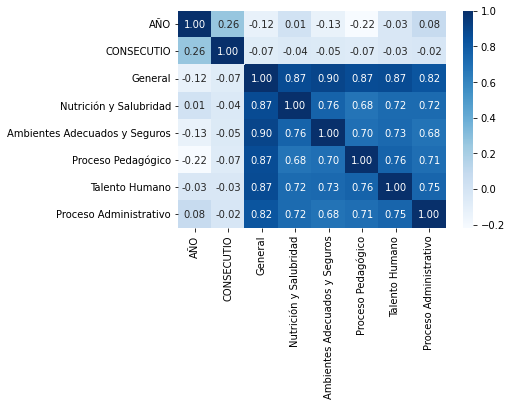

In [ ]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, cmap="Blues", annot=True, fmt=".2f");

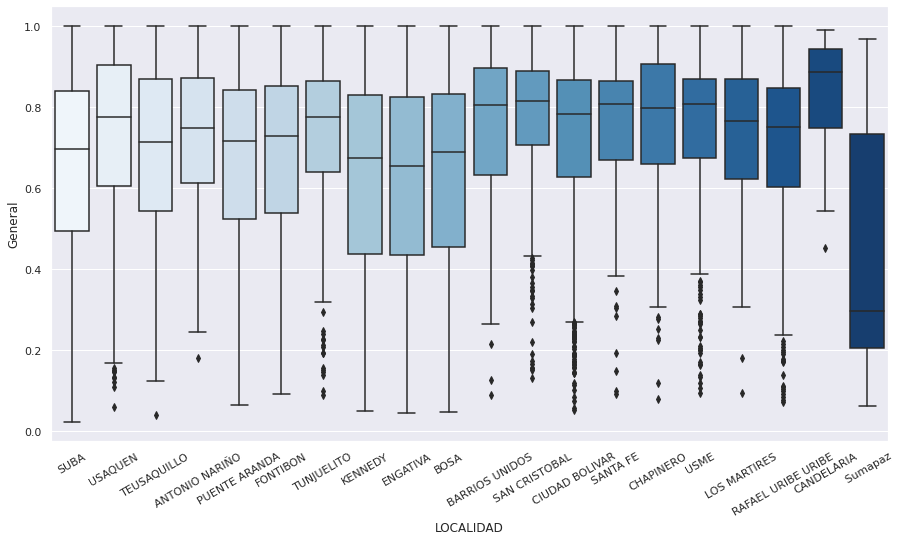

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="LOCALIDAD", y = "General", data = data, palette="Blues")
ax.tick_params(axis='x', labelrotation=30)

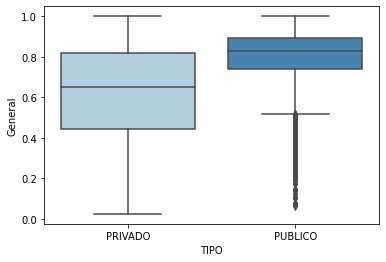

In [ ]:
sns.boxplot(x="TIPO", y = "General", data = data, palette="Blues")

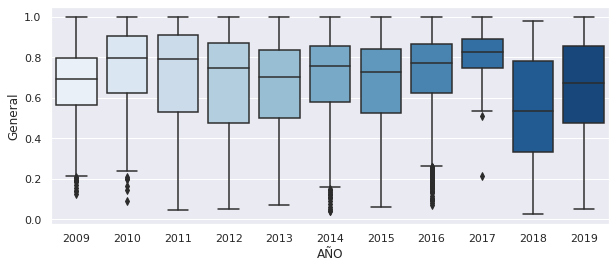

In [ ]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.boxplot(x="AÑO", y = "General", data = data, palette="Blues")

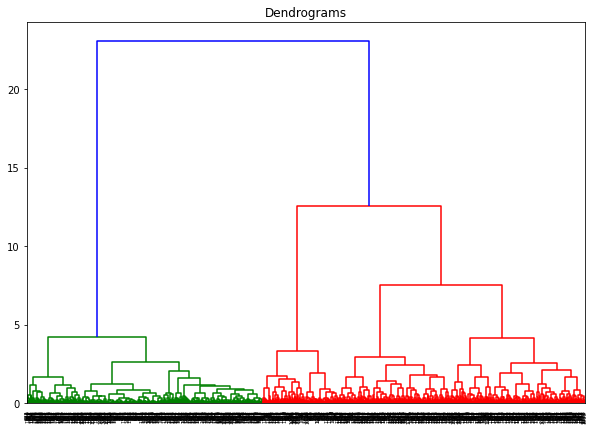

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
data_cluster=data[data["AÑO"]==2019]
dend = shc.dendrogram(shc.linkage(data_cluster[["Nutrición y Salubridad","Ambientes Adecuados y Seguros","Proceso Pedagógico","Talento Humano","Proceso Administrativo"]], method='ward'))
#plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_cluster[["Nutrición y Salubridad","Ambientes Adecuados y Seguros","Proceso Pedagógico","Talento Humano","Proceso Administrativo"]])

array([0, 2, 2, ..., 1, 1, 1])

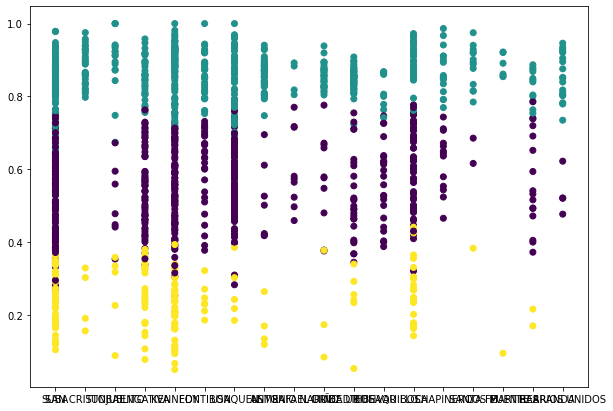

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(x=data_cluster['LOCALIDAD'], y=data_cluster['General'], c=cluster.labels_) 

In [ ]:
data_cluster["Segmento"]=cluster.labels_
data_cluster[["Segmento","General","Nutrición y Salubridad","Ambientes Adecuados y Seguros","Proceso Pedagógico","Talento Humano","Proceso Administrativo"]].groupby(by=["Segmento"]).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Segmento,General,Nutrición y Salubridad,Ambientes Adecuados y Seguros,Proceso Pedagógico,Talento Humano,Proceso Administrativo
0,0,0.555162,0.614236,0.566679,0.497232,0.528467,0.544875
1,1,0.859720,0.861420,0.816968,0.878653,0.884749,0.896152
2,2,0.244082,0.274752,0.365863,0.091370,0.178148,0.212826


In [ ]:
data_cluster[["LOCALIDAD","Segmento","INSCRIPCION"]].groupby(by=["Segmento","LOCALIDAD"]).count().reset_index()

,Segmento,LOCALIDAD,INSCRIPCION
0,0,ANTONIO NARIÑO,9
1,0,BARRIOS UNIDOS,4
2,0,BOSA,56
3,0,CHAPINERO,13
4,0,CIUDAD BOLIVAR,26
5,0,ENGATIVA,66
6,0,FONTIBON,26
7,0,KENNEDY,104
8,0,PUENTE ARANDA,16
9,0,RAFAEL URIBE URIBE,10


In [ ]:
data_cluster[["TIPO","Segmento","INSCRIPCION"]].groupby(by=["Segmento","TIPO"]).count().reset_index()

,Segmento,TIPO,INSCRIPCION
0,0,PRIVADO,600
1,0,PUBLICO,4
2,1,PRIVADO,228
3,1,PUBLICO,350
4,2,PRIVADO,185
5,2,PUBLICO,1


In [ ]:
import openpyxl
data_cluster.to_excel('segmentos.xlsx', sheet_name='new')
